# Iris classification

In [1]:
# 0. Setup

import matplotlib.pyplot as plt
import numpy as np
import os
import pydotplus
import seaborn as sns

from io import StringIO
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

from sklearn import datasets, neighbors, tree
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load Iris dataset

In [7]:
# 1. Load Iris data set
iris = datasets.load_iris()

# Show Iris data set components

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [10]:
# Example data point:
iris.data[0], iris.target[0]

(array([ 5.1,  3.5,  1.4,  0.2]), 0)

In [11]:
# Tabular data visualization:
import pandas as pd

nmap = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df = pd.concat([pd.DataFrame(iris.data), pd.DataFrame(iris.target)], 1)
iris_df.columns = iris.feature_names + ['target names']
iris_df['target names'] = list(map(lambda i: nmap[i], iris_df['target names']))
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# Decision tree visualization

In [12]:
def save_decision_tree_graph(clf, fn):
    dot_data = StringIO()
    tree.export_graphviz(clf
                        , out_file=dot_data
                        , feature_names=iris.feature_names
                        , class_names = iris.target_names
                        , filled=True
                        , rounded=True
                        , impurity=False)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    if not os.path.exists('saved'):
        os.makedirs('saved')

    graph.write_pdf('saved/{}.pdf'.format(fn))
    graph.write_png('saved/{}.png'.format(fn))
    
    Image(filename='saved/{}.png'.format(fn))

# Decision tree (144, 3, 3)

## Data partition

We partition Iris data into
* 144 `train_data` and `train_target` samples
* 3 (one from each class) test samples
* 3 (one from each class) holdout samples

In [13]:
# test
test_ix = [50*s+i for s in range(0, len(set(iris.target))) for i in range(0, 1) ]
test_data = iris.data[test_ix]
test_target = iris.target[test_ix]

# holdout
holdout_ix = [50*s+i for s in range(0, len(set(iris.target))) for i in range(1, 2) ]
holdout_data = iris.data[holdout_ix]
holdout_target = iris.target[holdout_ix]

# train
train_data = np.delete(iris.data, test_ix + holdout_ix, axis=0)
train_target = np.delete(iris.target, test_ix + holdout_ix)

## Training

In [14]:
clf144 = tree.DecisionTreeClassifier()
clf144.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Visualization

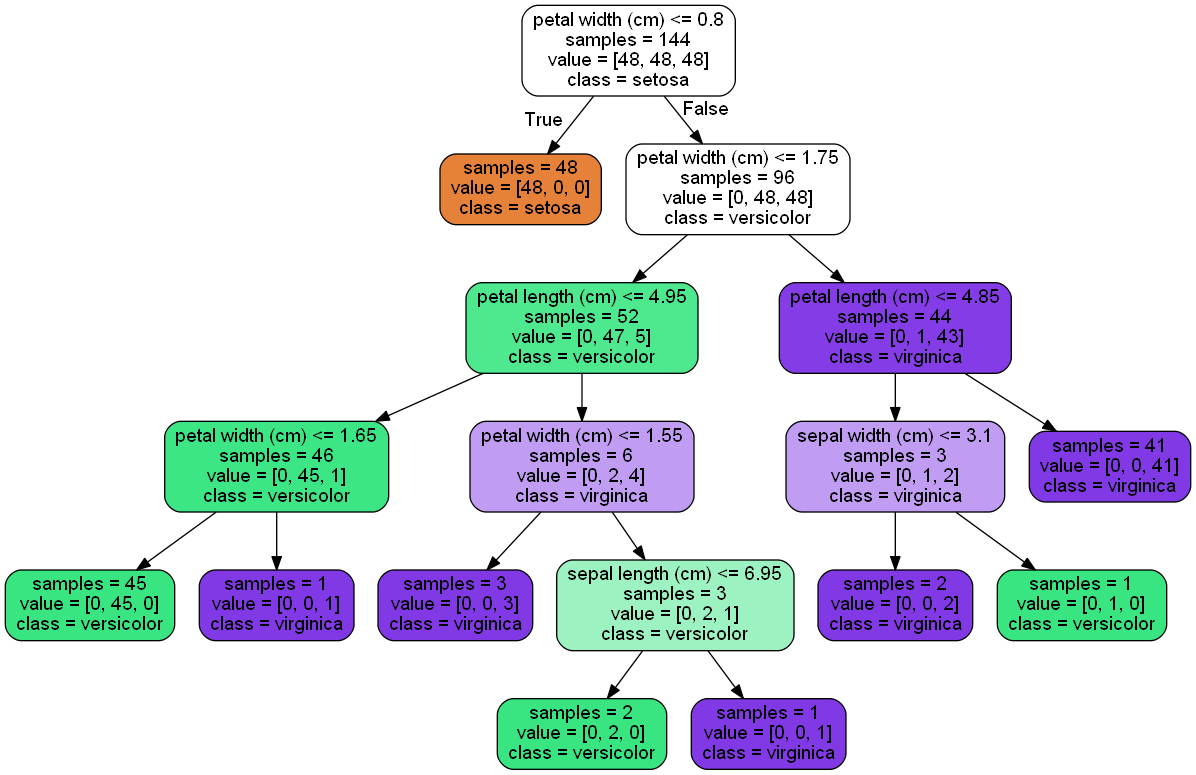

In [15]:
save_decision_tree_graph(clf144, 'iris-144')
Image(filename='saved/{}.png'.format('iris-144'))

## Testing the classifier

In [16]:
test_data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 7. ,  3.2,  4.7,  1.4],
       [ 6.3,  3.3,  6. ,  2.5]])

In [17]:
test_target

array([0, 1, 2])

In [18]:
predictions = clf144.predict(test_data)
predictions

array([0, 1, 2])

## Testing for the holdout samples

In [14]:
holdout_data

array([[ 4.9,  3. ,  1.4,  0.2],
       [ 6.4,  3.2,  4.5,  1.5],
       [ 5.8,  2.7,  5.1,  1.9]])

In [15]:
holdout_target

array([0, 1, 2])

In [16]:
predictions = clf144.predict(holdout_data)
predictions

array([0, 1, 2])

## Accuracy score:

In [17]:
# Manual prediction accuracy:
np.sum(test_target == predictions) / len(predictions)

1.0

# Decision tree (75, 75, 0)

## Data partition

We partition the data into
* 75 training samples,
* 75 test samples, and
* 0 holdout samples.

In [19]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

## Training

In [20]:
clf75 = tree.DecisionTreeClassifier()
clf75.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Visualization

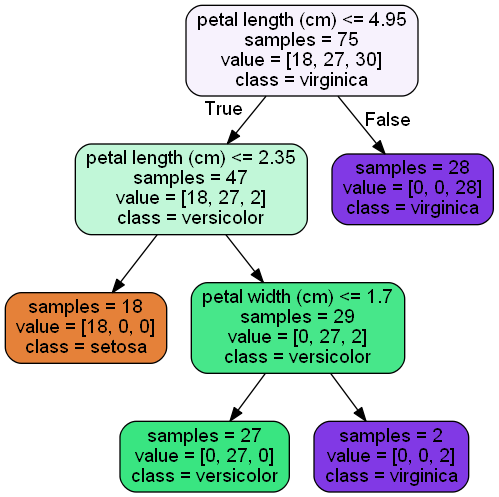

In [21]:
save_decision_tree_graph(clf75, 'iris-75')
Image(filename='saved/iris-75.png')

## Accuracy

In [22]:
predictions = clf75.predict(X_test)
accuracy_score(y_test, predictions)

0.94666666666666666

# Decision tree (75, 75) with controlled depth

We use data from the previous partition, but, enfroce tree depth to prevent overfitting.

## Training

In [28]:
clf75d4 = tree.DecisionTreeClassifier(max_depth=3)
clf75d4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Visualization

In [29]:
save_decision_tree_graph(clf75d4, 'iris-75-d4')
Image(clf75d4, 'saved/iris-75-d4.png')

## Accuracy

In [30]:
predictions = clf75d4.predict(X_test)
accuracy_score(y_test, predictions)

# same accuracy, better generalization

0.94666666666666666

# K-nearest neighbor classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

## Training

We use (75, 75) data partition generated before.

In [32]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Visualize

In [33]:
def display_model(clf, X, y, x_label='', y_label='', title='', mesh_steps=100):
    x_min, y_min, x_max, y_max = (m(X[:, i]) for m in [min, max] for i in range(X.shape[1]))
    
    h = min(y_max - y_min, x_max - x_min) / mesh_steps
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h)
                        , np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.show()

In [34]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [35]:
def display_knn(X_train, y_train, X_test, y_test, axis_names, title, **gkwargs):
    def display(dims, **kwargs):
        kwargs.update(gkwargs)
        display_model(KNeighborsClassifier().fit(X_train[:, dims], y_train), X_test[:, dims], y_test, x_label=axis_names[0], y_label=axis_names[1], title='{}: {} vs {}'.format(title, axis_names[0], axis_names[1]), **kwargs)
        
    return display

knn_disp = display_knn(X_train, y_train, X_test, y_test, iris.feature_names, 'KNN Iris classifier')

C:\Users\jarekh\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\jarekh\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


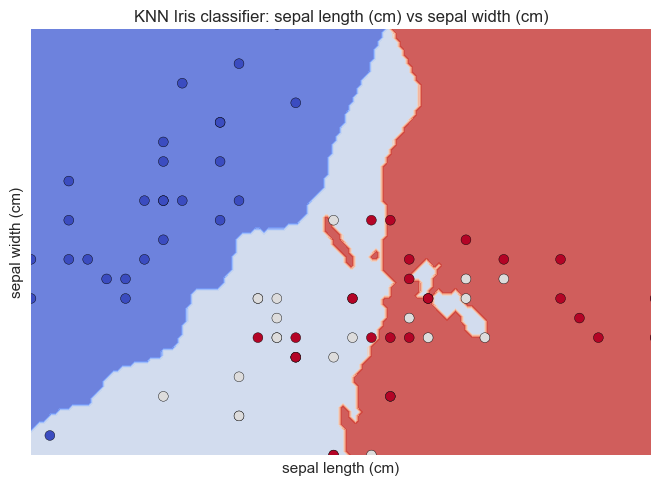

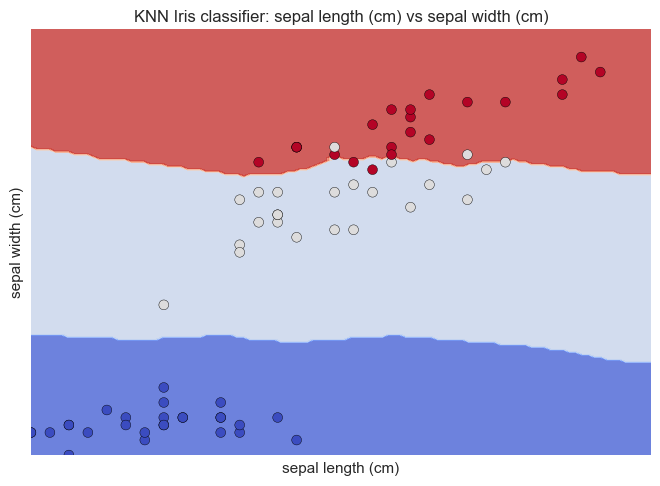

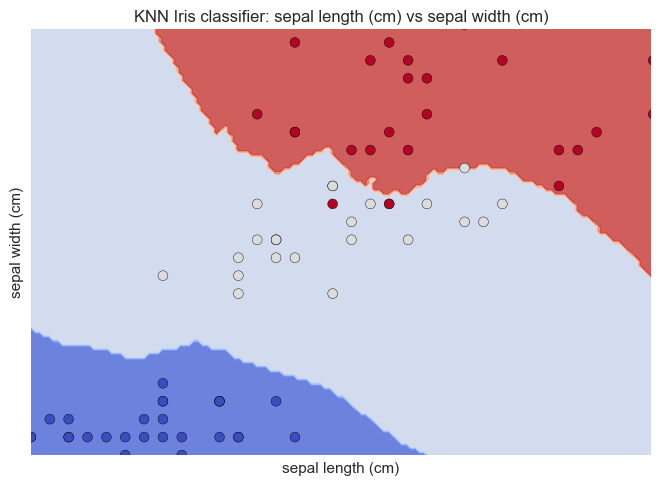

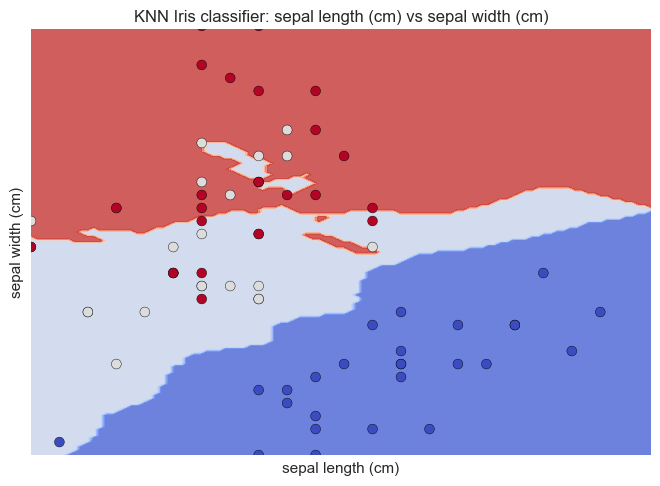

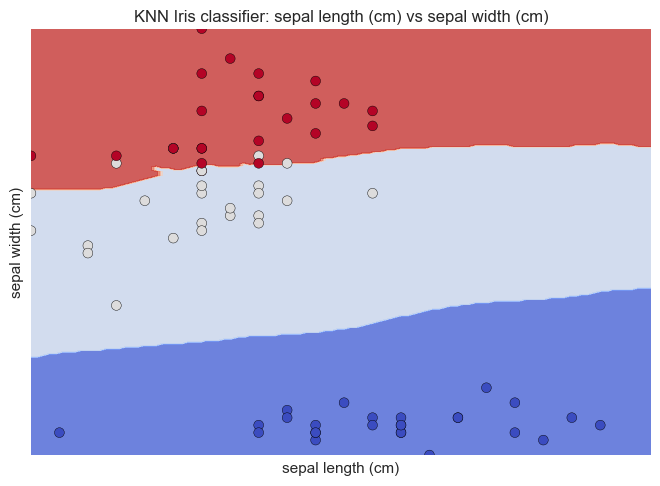

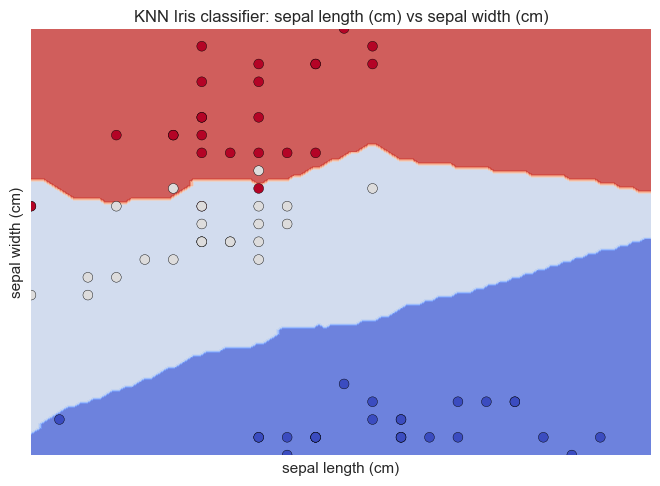

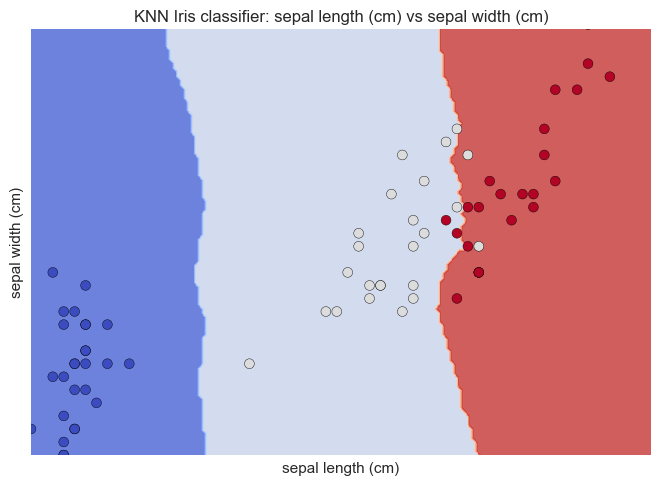

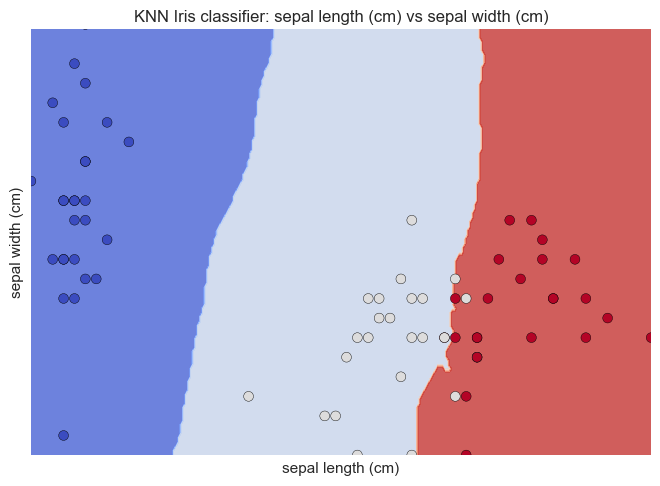

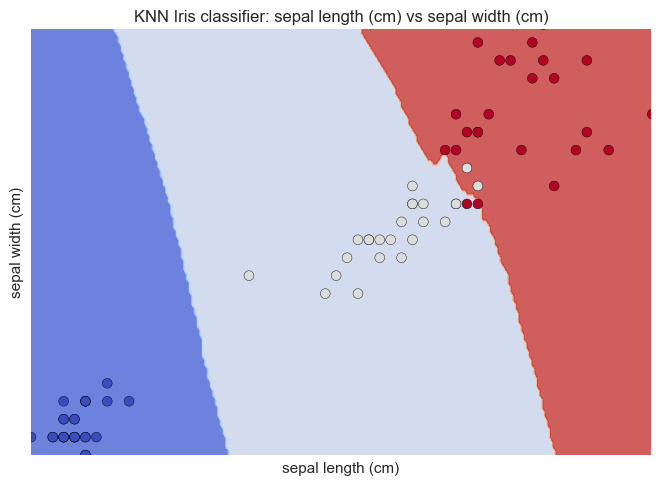

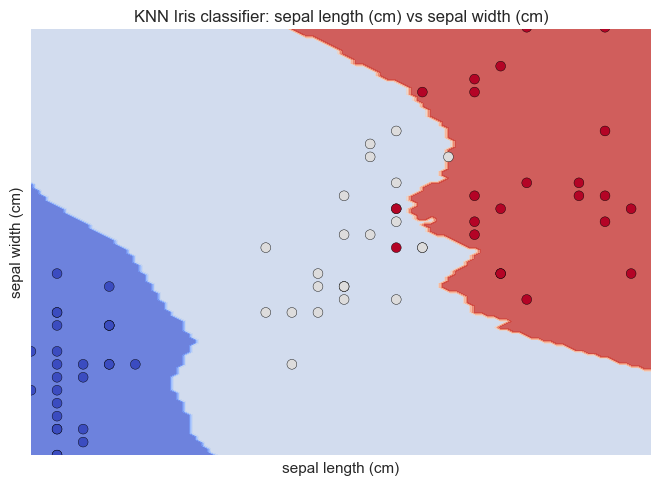

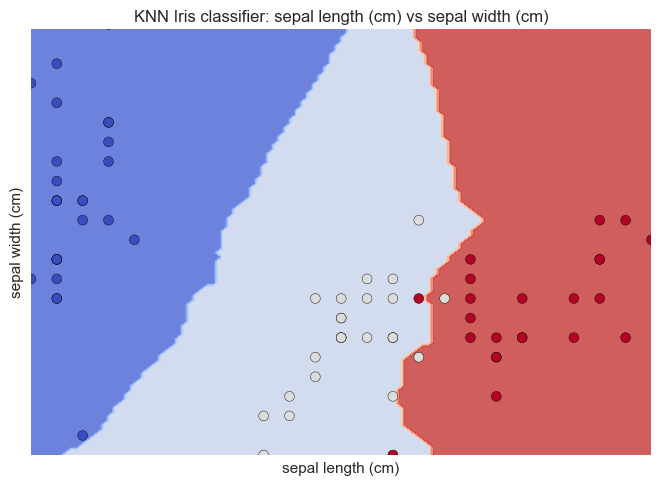

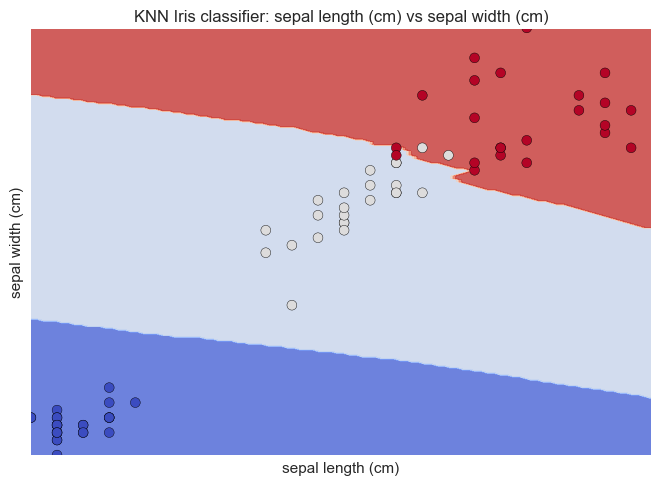

In [30]:
_ = [knn_disp((i, j)) for i in range(4) for j in range(4) if i != j]

## Accuracy

In [36]:
predictions = clf_knn.predict(X_test)
accuracy_score(y_test, predictions)

0.95999999999999996

# Scrappy - building our own classifier

We build our own classifier using Euclidean distance in the space of $dim|X|$.

## Implementation

In [37]:
from scipy.spatial import distance

class ScrappyKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        return [self.closest(row) for row in X_test]
        
    def closest(self, row):
        dist = [(distance.euclidean(row, v), i) for i, v in enumerate(self.X_train)]
        closest_ix = min(dist, key=lambda t: t[0])[1]
        return self.y_train[closest_ix]

## Training

In [38]:
myclf = ScrappyKNN()
myclf.fit(X_train, y_train)

## Accuracy

In [39]:
predictions = myclf.predict(X_test)
accuracy_score(y_test, predictions)

0.94666666666666666

In [40]:
X_train

array([[ 6.4,  3.2,  5.3,  2.3],
       [ 5.5,  4.2,  1.4,  0.2],
       [ 6.5,  3.2,  5.1,  2. ],
       [ 6.7,  3.1,  4.4,  1.4],
       [ 5.7,  2.8,  4.1,  1.3],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 6.7,  3.3,  5.7,  2.1],
       [ 6.3,  3.3,  4.7,  1.6],
       [ 5.1,  3.4,  1.5,  0.2],
       [ 7.7,  3. ,  6.1,  2.3],
       [ 6.4,  3.1,  5.5,  1.8],
       [ 6.1,  2.6,  5.6,  1.4],
       [ 5.1,  2.5,  3. ,  1.1],
       [ 6.7,  3.3,  5.7,  2.5],
       [ 7.4,  2.8,  6.1,  1.9],
       [ 6.4,  2.8,  5.6,  2.1],
       [ 4.5,  2.3,  1.3,  0.3],
       [ 5.8,  2.7,  5.1,  1.9],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5.5,  2.5,  4. ,  1.3],
       [ 6. ,  2.9,  4.5,  1.5],
       [ 6. ,  2.2,  4. ,  1. ],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 6.2,  3.4,  5.4,  2.3],
       [ 5.8,  2.8,  5.1,  2.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 6.3,  3.4,  5.6,  2.4],
       [ 6.2,  2.2,  4.5,  1.5],
       [ 6